## Imports
---

In [19]:
import torch

torch.cuda.is_available()

False

In [1]:
from model.model import CNet2D
from model.dataloader import NearlabDatasetLoader, NinaproDatasetLoader
from model.utils import list_files
import scipy.io
import numpy as np
import pandas as pd

In [5]:
path_nearlab = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features/person1"
version="GLVQ"
file_paths_nearlab = list_files(path_nearlab, "csv")

data = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_test, y_test = data.load_data(split_method="repetition_wise")

In [2]:
path_ninapro = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/ninapro/DB2/person1"
version="GMLVQ"
file_paths_ninapro = list_files(path_ninapro, "mat")

# Evaluation
---

# What i want to evaluate

1. Accuracy overview GLVQ, GMLVQ and Softmax
    - Also keep into account which model is being used
    - Compare to standard Machine learning methods
2. Compare different number of prototypes
    - Run the algorithm for GLVQ and GMLVQ for different numbers of the prototypes and plot the difference between number and accuracy
3. Something with few-shot learning
4. Compare Confusion matrices to see where each model has its trouble
5. Graph of the accuracy per subject
6. Plot of the loss function how it decreases over each epoch
7. Plot of the model accracy
8. Table with each Layer with the following values:
    1. Average Accuracy
    2. Std
    3. Median
    4. Highest and lowest value

### 1. Accuracy with 50 epochs on each model + Plot of loss and acc

Test Accuracy: 0.9067


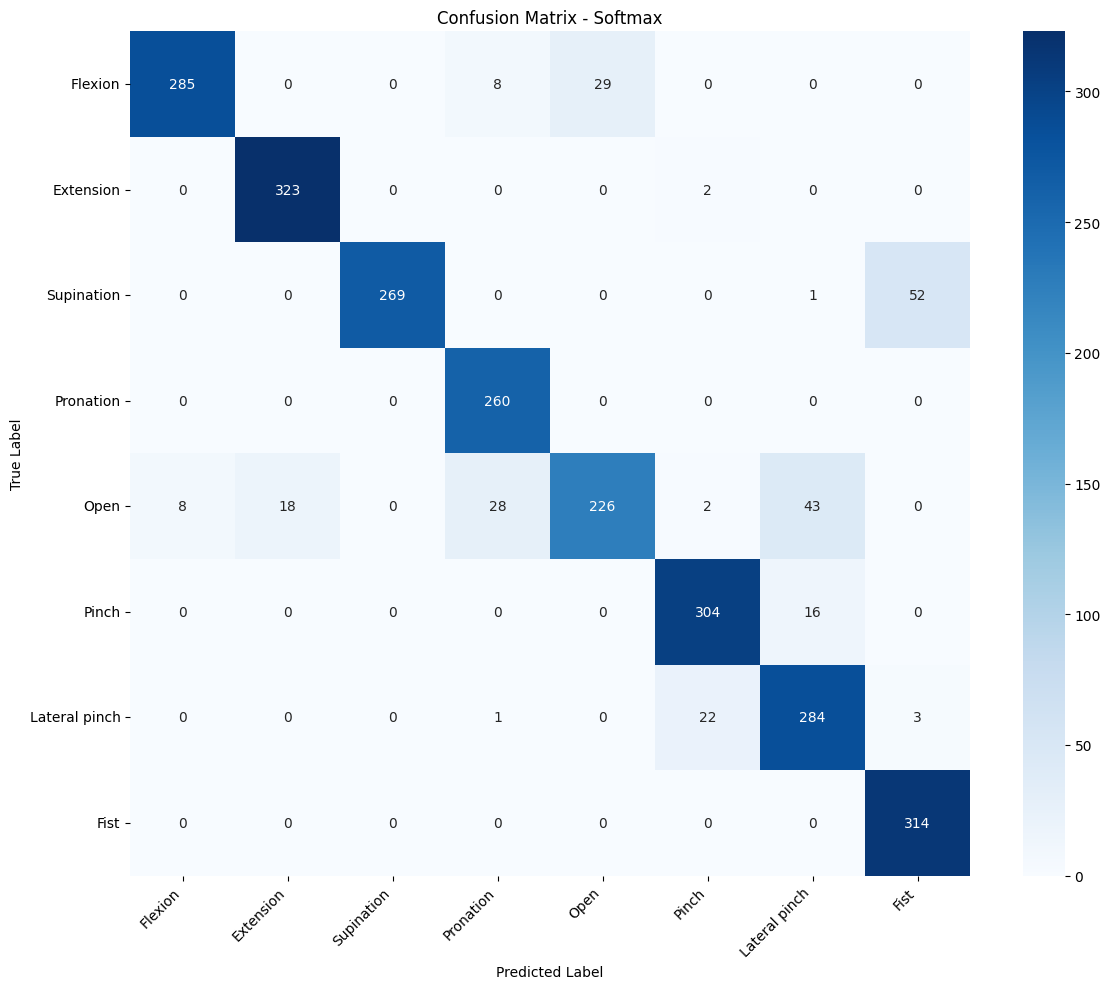


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.97      0.89      0.93       322
    Extension       0.95      0.99      0.97       325
   Supination       1.00      0.84      0.91       322
    Pronation       0.88      1.00      0.93       260
         Open       0.89      0.70      0.78       325
        Pinch       0.92      0.95      0.94       320
Lateral pinch       0.83      0.92      0.87       310
         Fist       0.85      1.00      0.92       314

     accuracy                           0.91      2498
    macro avg       0.91      0.91      0.91      2498
 weighted avg       0.91      0.91      0.90      2498


Per-class Accuracy:
Flexion: 0.8851
Extension: 0.9938
Supination: 0.8354
Pronation: 1.0000
Open: 0.6954
Pinch: 0.9500
Lateral pinch: 0.9161
Fist: 1.0000
Evaluation für Person 1, Modell Softmax: {'accuracy': 0.9067253470420837, 'confusion_matrix': array([[285,   0,   0,   8,  29,   0,   0,   0],
       [  0, 323

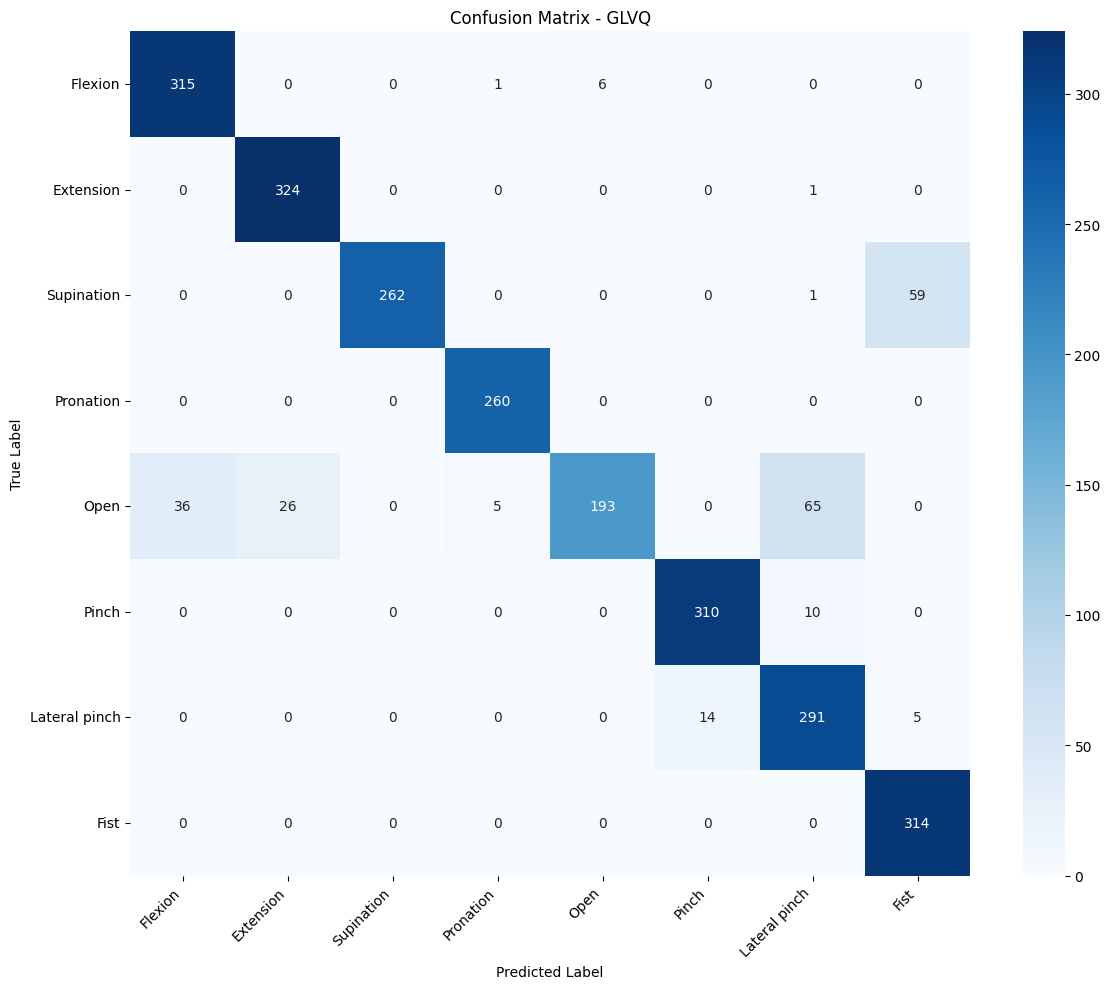


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.90      0.98      0.94       322
    Extension       0.93      1.00      0.96       325
   Supination       1.00      0.81      0.90       322
    Pronation       0.98      1.00      0.99       260
         Open       0.97      0.59      0.74       325
        Pinch       0.96      0.97      0.96       320
Lateral pinch       0.79      0.94      0.86       310
         Fist       0.83      1.00      0.91       314

     accuracy                           0.91      2498
    macro avg       0.92      0.91      0.91      2498
 weighted avg       0.92      0.91      0.90      2498


Per-class Accuracy:
Flexion: 0.9783
Extension: 0.9969
Supination: 0.8137
Pronation: 1.0000
Open: 0.5938
Pinch: 0.9688
Lateral pinch: 0.9387
Fist: 1.0000
Evaluation für Person 1, Modell GLVQ: {'accuracy': 0.9083266258239746, 'confusion_matrix': array([[315,   0,   0,   1,   6,   0,   0,   0],
       [  0, 324,  

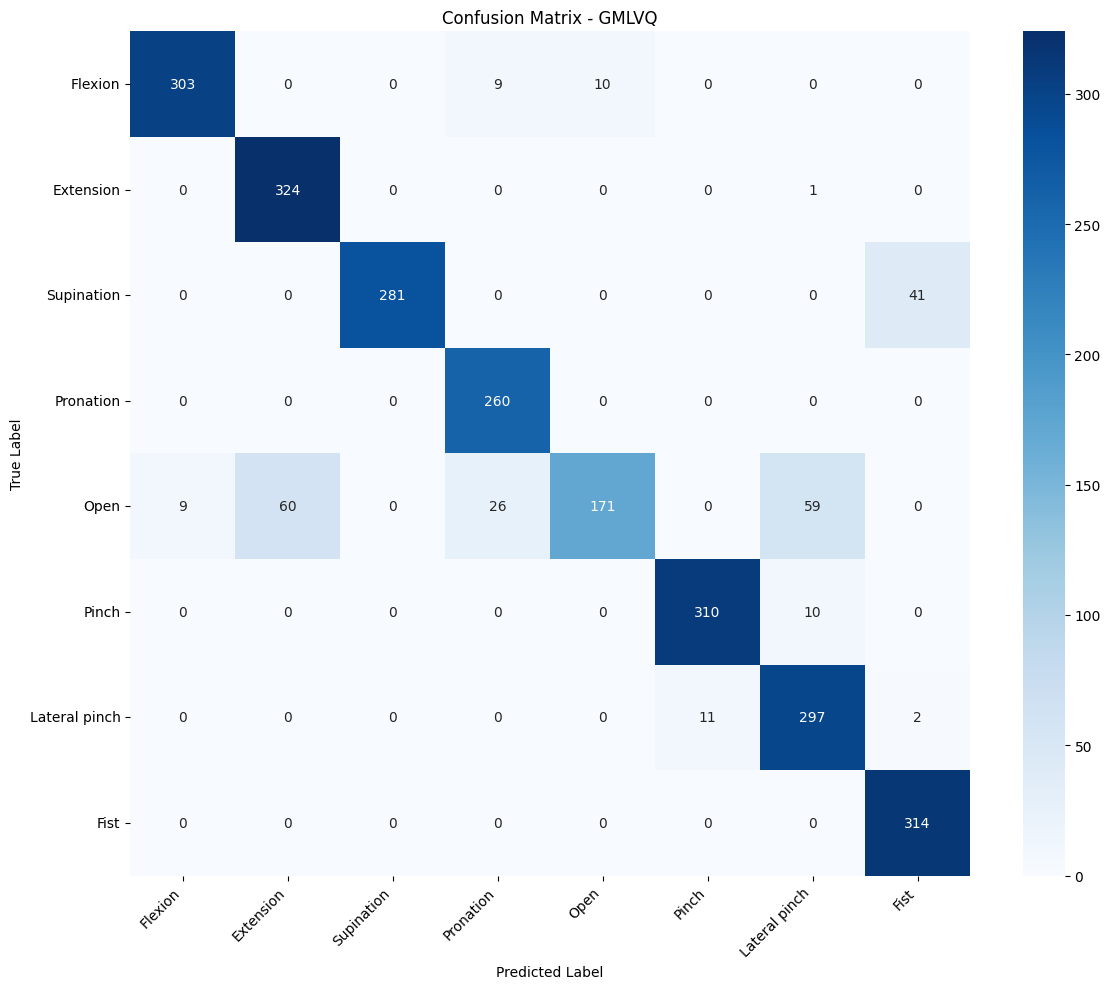


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.97      0.94      0.96       322
    Extension       0.84      1.00      0.91       325
   Supination       1.00      0.87      0.93       322
    Pronation       0.88      1.00      0.94       260
         Open       0.94      0.53      0.68       325
        Pinch       0.97      0.97      0.97       320
Lateral pinch       0.81      0.96      0.88       310
         Fist       0.88      1.00      0.94       314

     accuracy                           0.90      2498
    macro avg       0.91      0.91      0.90      2498
 weighted avg       0.91      0.90      0.90      2498


Per-class Accuracy:
Flexion: 0.9410
Extension: 0.9969
Supination: 0.8727
Pronation: 1.0000
Open: 0.5262
Pinch: 0.9688
Lateral pinch: 0.9581
Fist: 1.0000
Evaluation für Person 1, Modell GMLVQ: {'accuracy': 0.9047237634658813, 'confusion_matrix': array([[303,   0,   0,   9,  10,   0,   0,   0],
       [  0, 324, 

PermissionError: [Errno 13] Permission denied: 'E:/Dennis_Bachelor/Bachelor_Thesis-main/src/results/basicEval/person2_Softmaxh5/model_state.pth'

In [4]:
model = ["Softmax", "GLVQ", "GMLVQ"]

path_results = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/results/basicEval"
path_data = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/data/nearlab/8features"

for i in range(1, 12):
    file_paths_nearlab = list_files(path_data + "/person" + str(i), "csv")
    nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
    X_train, y_train, X_test, y_test = nearlab.load_data()
    for m in model:
        # Pfad der gespeicherten Modellzustände
        model_state_path = path_results + "/person" + str(i) + "_" + m + "h5/model_state.pth"
        
        # Neues Modell-Objekt erstellen
        current_model = CNet2D(version=m, epochs=50, batch_size=32)
        
        # Modellzustand laden
        current_model.load_model_state(model_state_path)
        
        # Modell evaluieren
        evaluation = current_model.evaluate_model(X_test, y_test)
        
        # Ergebnisse anzeigen
        print(f"Evaluation für Person {i}, Modell {m}: {evaluation}")


In [3]:
model = ["GLVQ", "GMLVQ"]

path_results = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/results/basicEval"
path_data = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/data/nearlab/8features"


for i in range(1,12):
    file_paths_nearlab = list_files(path_data + "/person" + str(i), "csv")
    nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
    X_train, y_train, X_test, y_test = nearlab.load_data()
    for m in model:
        current_model = CNet2D(version=m, epochs=50, batch_size=32)
        history = current_model.fit(X_train, y_train)
        current_model.save_history_csv(history, path_results + "/person" + str(i) + "_" + m + ".csv")
        current_model.save_model_state(path_results + "/person" + str(i) + "_" + m + "h5")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\dirty\miniconda3\envs\glvq\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\dirty\miniconda3\envs\glvq\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\dirty\miniconda3\envs\glvq\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\dirty\miniconda3\envs\glvq\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
 

Epoch 1/50, Loss: 0.4226
Epoch 2/50, Loss: 0.3276
Epoch 3/50, Loss: 0.3066
Epoch 4/50, Loss: 0.2971
Epoch 5/50, Loss: 0.2947
Epoch 6/50, Loss: 0.2905
Epoch 7/50, Loss: 0.2887
Epoch 8/50, Loss: 0.2872
Epoch 9/50, Loss: 0.2864
Epoch 10/50, Loss: 0.2862
Epoch 11/50, Loss: 0.2844
Epoch 12/50, Loss: 0.2847
Epoch 13/50, Loss: 0.2826
Epoch 14/50, Loss: 0.2836
Epoch 15/50, Loss: 0.2820
Epoch 16/50, Loss: 0.2825
Epoch 17/50, Loss: 0.2810
Epoch 18/50, Loss: 0.2812
Epoch 19/50, Loss: 0.2816
Epoch 20/50, Loss: 0.2809
Epoch 21/50, Loss: 0.2806
Epoch 22/50, Loss: 0.2800
Epoch 23/50, Loss: 0.2803
Epoch 24/50, Loss: 0.2795
Epoch 25/50, Loss: 0.2803
Epoch 26/50, Loss: 0.2799
Epoch 27/50, Loss: 0.2790
Epoch 28/50, Loss: 0.2797
Epoch 29/50, Loss: 0.2794
Epoch 30/50, Loss: 0.2791
Epoch 31/50, Loss: 0.2787
Epoch 32/50, Loss: 0.2786
Epoch 33/50, Loss: 0.2789
Epoch 34/50, Loss: 0.2788
Epoch 35/50, Loss: 0.2791
Epoch 36/50, Loss: 0.2787
Epoch 37/50, Loss: 0.2788
Epoch 38/50, Loss: 0.2789
Epoch 39/50, Loss: 0.

KeyboardInterrupt: 

### Playing around with GLVQ num of prototypes

In [ ]:
prototypes_per_class = [1, 2, 3, 4, 7]  


model = ["GLVQ", "GMLVQ"]

path_results = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/results/nearlab/numPrototypes"
path_data = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features"

for i in range(1,12):
    for prot in prototypes_per_class:
        file_paths_nearlab = list_files(path_data + "/person" + str(i), "csv")
        nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
        X_train, y_train, X_test, y_test = nearlab.load_data()
        for m in model:
            current_model = CNet2D(version=m, epochs=10)
            current_model.fit(X_train, y_train)
            current_model.save_model(path_results + "/person" + str(i) + "/" + m + "_num_" +str(prot) + ".h5")

## FSL Part

In [4]:
nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_test, y_test = nearlab.load_data()
mask_train = y_train != 7
X_train_no8 = X_train[mask_train]
y_train_no8 = y_train[mask_train]

print(len(X_train_no8))
print(len(X_train))

mask_class8 = y_test == 7
X_class8 = X_test[mask_class8]
y_class8 = y_test[mask_class8]

# Train model on the first 7 classes
model = CNet2D(version="GLVQ", num_classes=7, epochs=1)
model.fit(X_train_no8, y_train_no8)


4599
5273
Batch Loss (GLVQ/GMLVQ): 0.4988
Batch Loss (GLVQ/GMLVQ): 0.5122
Batch Loss (GLVQ/GMLVQ): 0.5109
Batch Loss (GLVQ/GMLVQ): 0.5096
Batch Loss (GLVQ/GMLVQ): 0.5063
Batch Loss (GLVQ/GMLVQ): 0.5024
Batch Loss (GLVQ/GMLVQ): 0.5025
Batch Loss (GLVQ/GMLVQ): 0.5002
Batch Loss (GLVQ/GMLVQ): 0.5012
Batch Loss (GLVQ/GMLVQ): 0.4964
Batch Loss (GLVQ/GMLVQ): 0.4960
Batch Loss (GLVQ/GMLVQ): 0.4935
Batch Loss (GLVQ/GMLVQ): 0.4908
Batch Loss (GLVQ/GMLVQ): 0.4898
Batch Loss (GLVQ/GMLVQ): 0.4881
Batch Loss (GLVQ/GMLVQ): 0.4844
Batch Loss (GLVQ/GMLVQ): 0.4845
Batch Loss (GLVQ/GMLVQ): 0.4835
Batch Loss (GLVQ/GMLVQ): 0.4803
Batch Loss (GLVQ/GMLVQ): 0.4811
Batch Loss (GLVQ/GMLVQ): 0.4761
Batch Loss (GLVQ/GMLVQ): 0.4804
Batch Loss (GLVQ/GMLVQ): 0.4712
Batch Loss (GLVQ/GMLVQ): 0.4715
Batch Loss (GLVQ/GMLVQ): 0.4705
Batch Loss (GLVQ/GMLVQ): 0.4731
Batch Loss (GLVQ/GMLVQ): 0.4667
Batch Loss (GLVQ/GMLVQ): 0.4690
Batch Loss (GLVQ/GMLVQ): 0.4634
Batch Loss (GLVQ/GMLVQ): 0.4616
Batch Loss (GLVQ/GMLVQ): 0.461

{'loss': [0.4825400470031632], 'epoch': [1]}

In [5]:
prototypes = model.classifier.get_prototypes()
print(prototypes.shape)

num_classes = model.classifier.get_num_classes()
print(num_classes)

num_prototypes = model.classifier.get_num_prototypes()
print(num_prototypes)

prototype_labels = model.classifier.get_prototype_labels()
print(prototype_labels)



torch.Size([7, 50])
7
7
Parameter containing:
tensor([0, 1, 2, 3, 4, 5, 6])


In [6]:
model.add_new_class(X_class8, y_class8[0])

In [7]:
prototypes = model.classifier.get_prototypes()
print(prototypes.shape)

num_classes = model.classifier.get_num_classes()
print(num_classes)

num_prototypes = model.classifier.get_num_prototypes()
print(num_prototypes)

prototype_labels = model.classifier.get_prototype_labels()
print(prototype_labels)



torch.Size([8, 50])
8
8
Parameter containing:
tensor([0, 1, 2, 3, 4, 5, 6, 7])


FSL Epoch 1/20, Loss: 6.1801
FSL Epoch 2/20, Loss: 6.1602
FSL Epoch 3/20, Loss: 6.1412
FSL Epoch 4/20, Loss: 6.1212
FSL Epoch 5/20, Loss: 6.1021
FSL Epoch 6/20, Loss: 6.0823
FSL Epoch 7/20, Loss: 6.0626
FSL Epoch 8/20, Loss: 6.0434
FSL Epoch 9/20, Loss: 6.0240
FSL Epoch 10/20, Loss: 6.0036
FSL Epoch 11/20, Loss: 5.9830
FSL Epoch 12/20, Loss: 5.9649
FSL Epoch 13/20, Loss: 5.9428
FSL Epoch 14/20, Loss: 5.9239
FSL Epoch 15/20, Loss: 5.9051
FSL Epoch 16/20, Loss: 5.8820
FSL Epoch 17/20, Loss: 5.8646
FSL Epoch 18/20, Loss: 5.8445
FSL Epoch 19/20, Loss: 5.8222
FSL Epoch 20/20, Loss: 5.8054
Test Accuracy: 0.6931


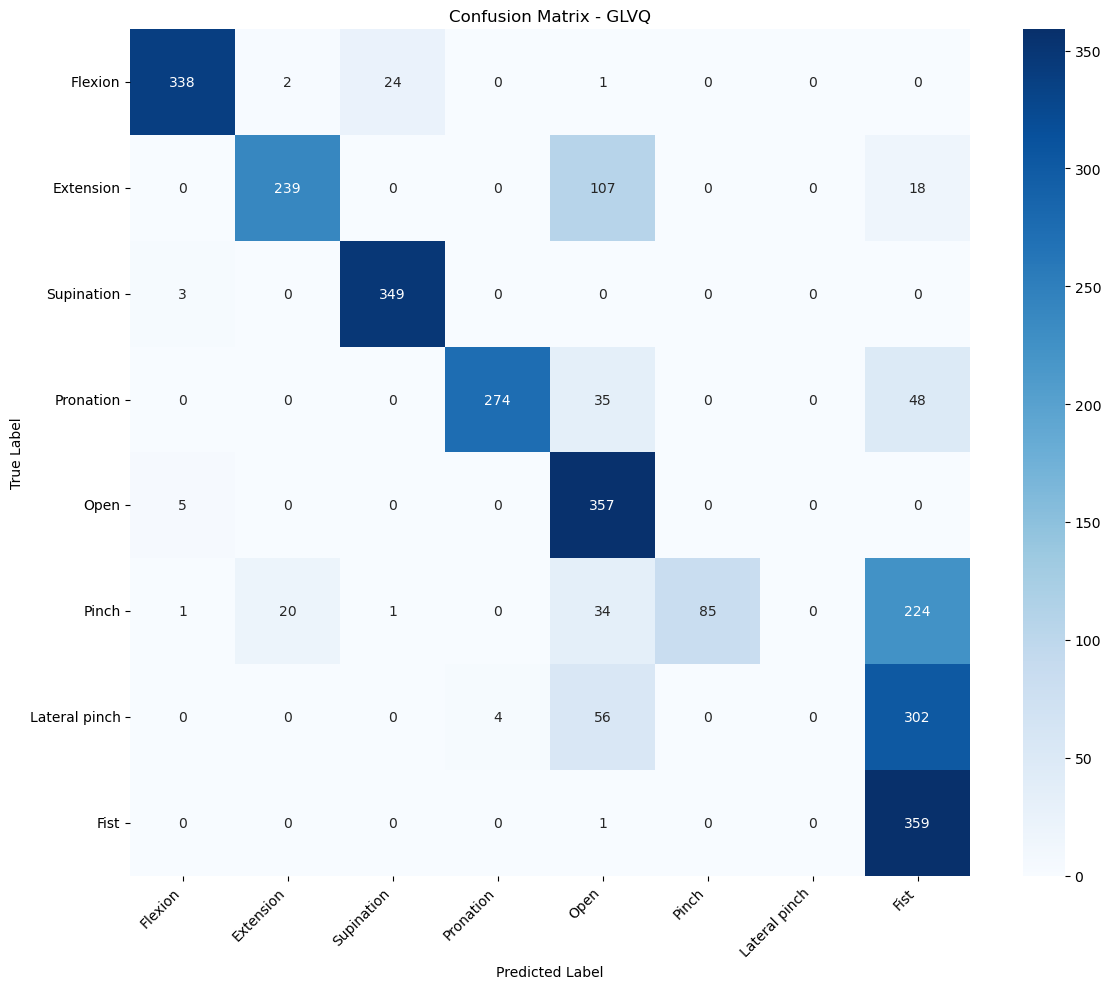


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.97      0.93      0.95       365
    Extension       0.92      0.66      0.76       364
   Supination       0.93      0.99      0.96       352
    Pronation       0.99      0.77      0.86       357
         Open       0.60      0.99      0.75       362
        Pinch       1.00      0.23      0.38       365
Lateral pinch       0.00      0.00      0.00       362
         Fist       0.38      1.00      0.55       360

     accuracy                           0.69      2887
    macro avg       0.72      0.69      0.65      2887
 weighted avg       0.72      0.69      0.65      2887


Per-class Accuracy:
Flexion: 0.9260
Extension: 0.6566
Supination: 0.9915
Pronation: 0.7675
Open: 0.9862
Pinch: 0.2329
Lateral pinch: 0.0000
Fist: 0.9972


/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [10]:
model.optimize_new_prototypes(X_class8, y_class8, epochs=20)

# Evaluate on all classes
results = model.evaluate_model(X_test, y_test)